<a href="https://colab.research.google.com/github/codjere/belajarIPYNBJere/blob/main/03_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pembacaan Dataset


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("./Sentiment1.csv", encoding='ISO-8859-1')

# DEA (Data Explorasi and Analisis)
Tujuan: Pemahaman data (bentuk data, distribusi, missing values, data duplikat, distribusi label, dan kata-kata yang sering muncul).

### Data Info

In [ ]:
# cek bentuk data
data.head()

,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 23:47:11 +0000 2023,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,DzulfiqorParisi,254,Negative
1,Wed Dec 13 23:46:34 +0000 2023,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",sumadiseloguno,222,Positive
2,Wed Dec 13 23:43:39 +0000 2023,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,AlfathMelfas,281,Negative
3,Wed Dec 13 23:36:50 +0000 2023,Kagum dgn senyum pak Anies yg teteup tersunggi...,SBahriTweet,216,Positive
4,Wed Dec 13 23:36:04 +0000 2023,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,samask_1,161,Neutral


In [ ]:
# melihat informasi didalam data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1336 non-null   object
 1   Text         1336 non-null   object
 2   Username     1336 non-null   object
 3   Length_Text  1336 non-null   int64 
 4   Sentiment    1336 non-null   object
dtypes: int64(1), object(4)
memory usage: 52.3+ KB


In [ ]:
data.drop(columns=['Date', 'Username', 'Length_Text'], axis=1, inplace=True)

In [ ]:
data.head()

,Text,Sentiment
0,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,Negative
1,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",Positive
2,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,Negative
3,Kagum dgn senyum pak Anies yg teteup tersunggi...,Positive
4,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,Neutral


In [ ]:
# melihat data deskripsi
data.describe()

,Text,Sentiment
count,1336,1336
unique,1327,3
top,@DPNAminBalad Mantap #YukJadiJubirAMIN #AniesM...,Positive
freq,3,988


### Distribusi Label

In [ ]:
# Melihat distribusi persebaran label
data.Sentiment.value_counts()

Sentiment
Positive    988
Neutral     187
Negative    161
Name: count, dtype: int64

In [ ]:
print(f"persentase data positif: {len(data[data['Sentiment'] == 'Positive'])/len(data)*100:.2f}%")
print(f"persentase data negatif: {len(data[data['Sentiment'] == 'Negative'])/len(data)*100:.2f}%")
print(f"persentase data netral: {len(data[data['Sentiment'] == 'Neutral'])/len(data)*100:.2f}%")

persentase data positif: 73.95%
persentase data negatif: 12.05%
persentase data netral: 14.00%


### Melihat data sampel

In [ ]:
# melihat data text pada index data ke 1
data.Text[0]

'@Hasbil_Lbs @aniesbaswedan gampang sih bikin video kya gt... konsepnya gt gampang banget, sebarin d medsos... rame deh netizen. tp yg perlindungan ingat adalah orang pintar pasti minumnya tolak dungu...   #AniesMuhaimin2024'

### Data Missing dan Data Duplikat

In [ ]:
# melihat missing value (data yang hilang) pada kolom komentar
data.Text.isnull().sum()

np.int64(0)

In [ ]:
# Melihat baris duplikat
duplicate_rows = data[data.duplicated()]
print("Duplicate rows based on all columns:\n", duplicate_rows)

Duplicate rows based on all columns:
                                                    Text Sentiment
196          Barokalloh #AMINAjaDulu #AniesMuhaimin2024  Positive
420   @DPNAminBalad AMIN Pilihan yang Tepat.  #YukJa...  Positive
514   @DPNAminBalad Mantap #YukJadiJubirAMIN #AniesM...  Positive
680   @DPNAminBalad Mantap #YukJadiJubirAMIN  #Anies...  Positive
685   @DPNAminBalad Mantap #YukJadiJubirAMIN  #Anies...  Positive
768   @DPNAminBalad Mantap #YukJadiJubirAMIN #AniesM...  Positive
1134  #AniesMuhaimin2024 #AMINAjaDulu #Gaza_Genocide...  Positive
1135  #AniesMuhaimin2024 #AMINAjaDulu #Gaza_Genocide...  Positive
1182  @aniesbaswedan Wakanda No More Indonesia Forev...  Positive


In [ ]:
# menghitung total data duplikat
data.duplicated().sum()

np.int64(9)

In [ ]:
# Harus menghapus duplikasi
data = data.drop_duplicates().reset_index(drop=True)
# atau bisa juga menggunakan kode di bawah ini
# data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.Sentiment.value_counts()

Sentiment
Positive    979
Neutral     187
Negative    161
Name: count, dtype: int64

In [ ]:
988 - 979
# ada pengurangan jumlah data positif sebanyak 9 data karena duplikasi

9

### Sampling Technique

In [ ]:
from sklearn.utils import resample

# buat data balancing technique dengan undersampling
# Pisahkan berdasarkan kelas
df_pos = data[data['Sentiment'] == "Positive"]
df_neu = data[data['Sentiment'] == "Neutral"]
df_neg = data[data['Sentiment'] == "Negative"]

In [ ]:
print(f"data positive : {df_pos.shape}")
print(f"data neutral : {df_neu.shape}")
print(f"data negative : {df_neg.shape}")

data positive : (979, 2)
data neutral : (187, 2)
data negative : (161, 2)


In [ ]:
# Tentukan target jumlah data (minoritas)
min_count = min(len(df_neu), len(df_neg))  # = 161

In [ ]:
min_count

161

In [ ]:
# Downsampling kelas mayoritas (Positive → 161)
df_pos_down = resample(df_pos,
                       replace=False,   # tidak melakukan duplikasi
                       n_samples=min_count,
                       random_state=42)

In [ ]:
df_pos_down.shape

(161, 2)

In [ ]:
# Gabungkan kembali dataset seimbang
df_balanced = pd.concat([df_pos_down, df_neu, df_neg])

In [ ]:
df_balanced.shape

(509, 2)

In [ ]:
type(df_balanced)

pandas.core.frame.DataFrame

In [ ]:
df_balanced.head()

,Text,Sentiment
289,kalo pencalonannya dengan cara yang baik dan b...,Positive
653,"Politisi kayak gini bikin bete, dulu gak deal,...",Positive
253,"Mereka orang baik, bukan pengkhianat konstitus...",Positive
1261,"Doa , Harapan &amp Dukungan Kami Berikan Untu...",Positive
96,"Bukti nyata, rakyat yang merasakan. Jakarta me...",Positive


In [ ]:
# Shuffle hasil
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df_balanced.head()

,Text,Sentiment
0,Ustad Abdul Somad mantap dukung AMIN ?? #Anie...,Positive
1,Masya Allah Tabarakallah #AniesMuhaimin2024,Neutral
2,@QianzyZ Nyindiiiiir... Nyindiiiiir... Nyindir...,Negative
3,"Cak Imin, kayaknya lupa deh sama prinsip-prins...",Negative
4,@aniesbaswedan Punchline nya keren pak.. Term...,Neutral


In [ ]:
print(df_balanced['Sentiment'].value_counts())

Sentiment
Neutral     187
Positive    161
Negative    161
Name: count, dtype: int64


### Train Test Split

**Train-Test**

In [ ]:
from sklearn.model_selection import train_test_split

texts = df_balanced['Text']
labels = df_balanced['Sentiment']

# 1. Stratified split
X_train, X_test = train_test_split(
    df_balanced, test_size=0.2, stratify=labels, random_state=42
)

In [ ]:
print(X_test.shape)
print(X_train.shape)

(102, 2)
(407, 2)


## Preprocessing

In [ ]:
text = X_test.Text.iloc[0]

In [ ]:
text

'Koruptor dijerakan, Perampasan aset disahkan agar supaya menjadi miskin.. penyampaian Visi misi Anies Muhaimin dalam debat capres kemarin #DebatCapres #anies #ordal #AniesMuhaimin2024 #AMINAjaDulu #prabowosubianto #ganjar https://t.co/m5pKoeytFg'

In [ ]:
# remove Lowercase
text = text.lower()


In [ ]:
text

'koruptor dijerakan, perampasan aset disahkan agar supaya menjadi miskin.. penyampaian visi misi anies muhaimin dalam debat capres kemarin #debatcapres #anies #ordal #aniesmuhaimin2024 #aminajadulu #prabowosubianto #ganjar https://t.co/m5pkoeytfg'

In [ ]:
# Menghapus tanda baca dan angka
import re

text = re.sub(r'[^a-zA-Z\s]', '', text)

In [ ]:
text

'koruptor dijerakan perampasan aset disahkan agar supaya menjadi miskin penyampaian visi misi anies muhaimin dalam debat capres kemarin debatcapres anies ordal aniesmuhaimin aminajadulu prabowosubianto ganjar httpstcompkoeytfg'

In [ ]:
# menghapus Stopword
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
tokens = [w for w in text.split() if w not in stop_words]
text = " ".join(tokens)

In [ ]:
text

'koruptor dijerakan perampasan aset disahkan miskin penyampaian visi misi anies muhaimin debat capres kemarin debatcapres anies ordal aniesmuhaimin aminajadulu prabowosubianto ganjar httpstcompkoeytfg'

In [ ]:
# melakukan Tokenisasi
from nltk.tokenize import word_tokenize

tokens = word_tokenize(text)

In [ ]:
tokens

['koruptor',
 'dijerakan',
 'perampasan',
 'aset',
 'disahkan',
 'miskin',
 'penyampaian',
 'visi',
 'misi',
 'anies',
 'muhaimin',
 'debat',
 'capres',
 'kemarin',
 'debatcapres',
 'anies',
 'ordal',
 'aniesmuhaimin',
 'aminajadulu',
 'prabowosubianto',
 'ganjar',
 'httpstcompkoeytfg']

In [ ]:
# melakukan stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
text = stemmer.stem(text)


In [ ]:
text

'koruptor jera ampas aset sah miskin sampai visi misi anies muhaimin debat capres kemarin debatcapres anies ordal aniesmuhaimin aminajadulu prabowosubianto ganjar httpstcompkoeytfg'

In [ ]:
# melakukan lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokens_lem = [lemmatizer.lemmatize(w) for w in tokens]


In [ ]:
tokens_lem

['koruptor',
 'dijerakan',
 'perampasan',
 'aset',
 'disahkan',
 'miskin',
 'penyampaian',
 'visi',
 'misi',
 'anies',
 'muhaimin',
 'debat',
 'capres',
 'kemarin',
 'debatcapres',
 'anies',
 'ordal',
 'aniesmuhaimin',
 'aminajadulu',
 'prabowosubianto',
 'ganjar',
 'httpstcompkoeytfg']

In [ ]:
# wrapping semua proses diatas
def preprocess(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Hapus angka & tanda baca
    text = re.sub(r'http\S+|@\w+|#[A-Za-z0-9_]+|www\.\S+', '', text)   # hapus URL, mention, hashtag
    text = re.sub(r'[^a-zA-Z\s]', '', text)                   # hapus angka & tanda baca
    text = re.sub(r'\s+', ' ', text).strip()                  # rapikan spasi

    # 3. Tokenisasi
    tokens = word_tokenize(text)

    # 4. Stopword removal
    tokens = [w for w in tokens if w not in stop_words]

    # 5. Stemming
    text = " ".join(tokens)
    text = stemmer.stem(text)

    return text

In [ ]:
X_train.Text = X_train.Text.apply(preprocess)
# X_train.Text = preprocess(X_train.Text)

In [ ]:
X_test.Text = X_test.Text.apply(preprocess)

In [ ]:
X_train.head()

,Text,Sentiment
507,prabowo kayak pimpin cak imin mainmain sanasin...,Negative
62,officialdpppbb tren topik indonesia aniesmuhai...,Neutral
504,wakanda no more indonesia forever jargon milen...,Positive
37,cak imin kritik fpi hti keraskeras dukung bene...,Negative
435,cak imin keras banget bilang fpi bahaya temenn...,Negative


In [ ]:
X_test.head()

,Text,Sentiment
233,koruptor jera ampas aset sah miskin sampai vis...,Negative
153,cak imin janji anies pilih langsung berantas p...,Neutral
154,cak imin sindir fpi hti dukung kayak temenan a...,Negative
291,prabowo cak imin drama queen politik nggak pea...,Negative
317,cak imin konon antifpi kyai ngemis restu rizie...,Negative


In [ ]:
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

def word_clod_plot(feature_name:str, data:pd.DataFrame):
    """_summary_

    Args:
        feature_name (str): _description_
    """
    txt = data[data['Sentiment'] == feature_name]['Text']
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(' '.join(txt))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {feature_name} Text')
    plt.axis('off')

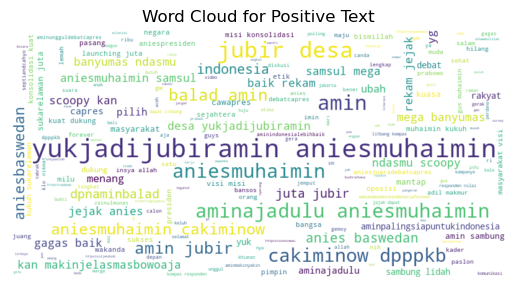

In [ ]:
word_clod_plot(feature_name='Positive', data=X_train)

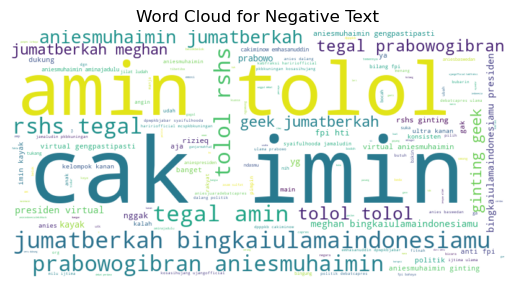

In [ ]:
word_clod_plot(feature_name='Negative', data=X_train)

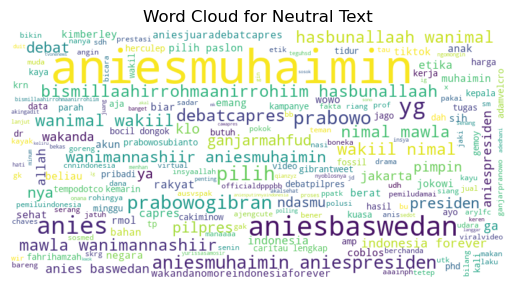

In [ ]:
word_clod_plot(feature_name='Neutral', data=X_train)

In [ ]:
from nltk.tokenize import word_tokenize
# tokenize the text
def text_tokenize(text:str)->list:
  return word_tokenize(text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer_X_train = TfidfVectorizer(analyzer=text_tokenize).fit_transform(X_train['Text'])
tfidf_transformer_X_test = TfidfVectorizer(analyzer=text_tokenize).fit_transform(X_test['Text'])

In [ ]:
# type(tfidf_transformer_X_train)
print(tfidf_transformer_X_train.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
tfidf_transformer_X_train.toarray().shape
# 407 = jumlah dokumen (jumlah teks dalam dataset)
# 2105 = jumlah fitur (jumlah kata unik setelah preprocessing)

(407, 2105)

In [ ]:
df = pd.DataFrame(tfidf_transformer_X_train.toarray())
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
